In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
img = np.array([
    [10, 10, 10, 0, 0, 0, 0],
    [10, 10, 10, 0, 0, 0, 0],
    [10, 10, 10, 0, 0, 0, 0],
    [10, 10, 10, 0, 0, 0, 0],
    [10, 10, 10, 0, 0, 0, 0],
    [10, 10, 10, 0, 0, 0, 0],
    [10, 10, 10, 0, 0, 0, 0]
], dtype=np.int64)

In [18]:
def box_sum(img: np.ndarray, k: int) -> np.ndarray:
    ii = img.cumsum(axis=0).cumsum(axis=1)
    ii = np.pad(ii, ((1, 0), (1, 0)), mode="constant")

    return ii[k:, k:] - ii[:-k, k:] - ii[k:, :-k] + ii[:-k, :-k]


def blur(img: np.ndarray, k: int) -> np.ndarray:
    pad_amount_total = k - 1
    q, r = divmod(pad_amount_total, 2)
    pad_left_top = q + r
    pad_right_bottom = q
    img_pad = np.pad(img, ((pad_left_top, pad_right_bottom), (pad_left_top, pad_right_bottom)), mode="reflect")
    box_summed = box_sum(img_pad, k)
    result = box_summed / (k**2)

    return result


blur(img, 3)

array([[10.        , 10.        ,  6.66666667,  3.33333333,  0.        ,
         0.        ,  0.        ],
       [10.        , 10.        ,  6.66666667,  3.33333333,  0.        ,
         0.        ,  0.        ],
       [10.        , 10.        ,  6.66666667,  3.33333333,  0.        ,
         0.        ,  0.        ],
       [10.        , 10.        ,  6.66666667,  3.33333333,  0.        ,
         0.        ,  0.        ],
       [10.        , 10.        ,  6.66666667,  3.33333333,  0.        ,
         0.        ,  0.        ],
       [10.        , 10.        ,  6.66666667,  3.33333333,  0.        ,
         0.        ,  0.        ],
       [10.        , 10.        ,  6.66666667,  3.33333333,  0.        ,
         0.        ,  0.        ]])

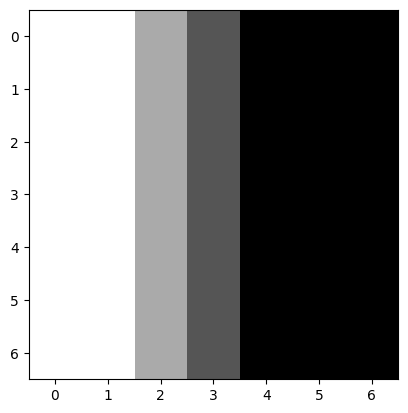

In [19]:
plt.imshow(blur(img, 3), cmap="gray")

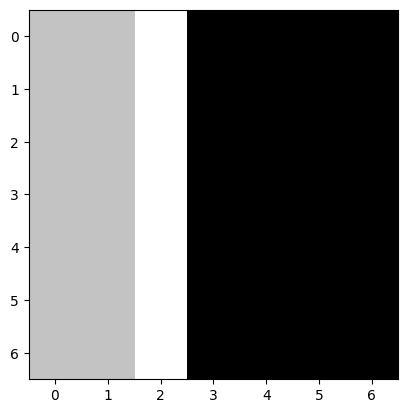

In [20]:
def sharpen(original: np.ndarray, blurred: np.ndarray) -> np.ndarray:
    result = original + 1.0 * (original - blurred)
    result_u8 = np.clip(result, 0, 255).round().astype(np.uint8)

    return result_u8


plt.imshow(sharpen(img, blur(img, 3)), cmap="gray")